<p style="background-color:#3ab1c8;font-family:Cursive;font-size:200%;color:black;text-align:center;border-radius:120px 20px;padding:20px;margin:20px;"><b>Kendi denemem - January 2024</b></p>

<p style="font-family:Cursive;font-size:100%;color:black;text-align:center;border-radius:10px 10px;"><b>by Nash</b></p>

<b style="font-family:Cursive;font-size:100%;color:black;text-align:right;border-radius:10px 10px;">Follow me [Linkedin](www.linkedin.com/in/nash-n-sungur-333869289) | [Git Hub](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0)</b>

In [1]:
#pip install tensorflow

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook

plt.rcParams["figure.figsize"] = (10,6)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
#pd.set_option('display.float_format', lambda x: '%.6f' % x)

C:\Users\nsgr6\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization 
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.neural_network import MLPClassifier

In [4]:
df = pd.read_csv("titanic_train_eda.csv")
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,X,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,X,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,X,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    object 
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [6]:
from sklearn.preprocessing import OrdinalEncoder

In [10]:
category = df.select_dtypes("object").columns
category

Index(['Sex', 'Cabin', 'Embarked'], dtype='object')

In [11]:
enc = OrdinalEncoder()
df[category] = enc.fit_transform(df[category])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1.0,22.0,1,0,7.2500,147.0,2.0
1,1,1,0.0,38.0,1,0,71.2833,81.0,0.0
2,1,3,0.0,26.0,0,0,7.9250,147.0,2.0
3,1,1,0.0,35.0,1,0,53.1000,55.0,2.0
4,0,3,1.0,35.0,0,0,8.0500,147.0,2.0


In [12]:
X = df[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Cabin", "Embarked"]].values
y = df["Survived"].values

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, train_size=None)

In [20]:
model = Sequential()
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [21]:
model.compile(loss='binary_crossentropy', metrics = ['accuracy'])

In [30]:
model.fit(x=X_train, y=y_train, batch_size=32, epochs=60)

Epoch 1/60
21/21 [==============================] - 0s 2ms/step - loss: 0.4410 - accuracy: 0.8024
Epoch 2/60
21/21 [==============================] - 0s 2ms/step - loss: 0.4732 - accuracy: 0.7994
Epoch 3/60
21/21 [==============================] - 0s 3ms/step - loss: 0.4417 - accuracy: 0.8129
Epoch 4/60
21/21 [==============================] - 0s 2ms/step - loss: 0.4865 - accuracy: 0.7769
Epoch 5/60
21/21 [==============================] - 0s 2ms/step - loss: 0.4838 - accuracy: 0.7725
Epoch 6/60
21/21 [==============================] - 0s 2ms/step - loss: 0.4504 - accuracy: 0.7994
Epoch 7/60
21/21 [==============================] - 0s 3ms/step - loss: 0.4806 - accuracy: 0.8009
Epoch 8/60
21/21 [==============================] - 0s 2ms/step - loss: 0.4680 - accuracy: 0.8039
Epoch 9/60
21/21 [==============================] - 0s 2ms/step - loss: 0.4451 - accuracy: 0.8069
Epoch 10/60
21/21 [==============================] - 0s 2ms/step - loss: 0.4750 - accuracy: 0.7889
Epoch 11/60
21/21 [

In [31]:
model.weights 

[<tf.Variable 'dense_3/kernel:0' shape=(8, 32) dtype=float32, numpy=
 array([[ 0.32537416, -0.04130805,  0.5436827 ,  0.40166435, -0.29498434,
         -0.00706706, -0.5269319 ,  0.03851145, -0.41682088, -0.4378812 ,
          0.06163266,  0.3339255 ,  0.1457697 ,  0.5478832 ,  0.11529057,
          0.13037522, -0.16029572,  0.3618631 , -0.6625164 , -0.16169101,
          0.12175851,  0.0028054 ,  0.66440916,  0.06992817,  0.01324202,
         -0.5093032 ,  0.1481443 , -0.57515085, -0.20559901, -0.4537484 ,
         -0.47041067,  0.08323045],
        [ 1.6250228 ,  0.5859346 , -0.6963289 ,  1.299137  , -0.22480449,
          1.2360901 ,  0.5226476 , -1.4500824 , -1.1333425 ,  0.430584  ,
         -0.23115927,  1.008921  , -1.0818337 , -0.9669687 , -0.9267301 ,
         -1.4704864 ,  0.93738604,  0.00467339,  1.5231113 ,  1.136597  ,
         -1.0896715 ,  0.09289192, -0.6975666 , -1.0964422 ,  0.35663706,
         -1.1667141 , -0.40444973,  0.5364683 , -1.1343793 , -0.24763426,
       

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                288       
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1377 (5.38 KB)
Trainable params: 1377 (5.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
model.history.history

{'loss': [0.4410456120967865,
  0.47320976853370667,
  0.44168752431869507,
  0.4864746034145355,
  0.48377442359924316,
  0.45035484433174133,
  0.48062726855278015,
  0.4680323004722595,
  0.44505783915519714,
  0.4749610126018524,
  0.4893461763858795,
  0.45541632175445557,
  0.45714905858039856,
  0.45250657200813293,
  0.4597759544849396,
  0.45993906259536743,
  0.43096959590911865,
  0.45396360754966736,
  0.440825879573822,
  0.4647975564002991,
  0.4603501856327057,
  0.4521711468696594,
  0.4208296239376068,
  0.4624972343444824,
  0.44957974553108215,
  0.4488641023635864,
  0.43879157304763794,
  0.44359132647514343,
  0.450190007686615,
  0.43024787306785583,
  0.47397443652153015,
  0.4464963376522064,
  0.44482719898223877,
  0.46341413259506226,
  0.4485522508621216,
  0.447194367647171,
  0.4631674885749817,
  0.44833916425704956,
  0.46941548585891724,
  0.4181590676307678,
  0.46183398365974426,
  0.4567537009716034,
  0.4727981388568878,
  0.4223308563232422,
  0.4

In [34]:
pd.DataFrame(model.history.history)

,loss,accuracy
0,0.441046,0.802395
1,0.473210,0.799401
2,0.441688,0.812874
3,0.486475,0.776946
4,0.483774,0.772455
5,0.450355,0.799401
6,0.480627,0.800898
7,0.468032,0.803892
8,0.445058,0.806886
9,0.474961,0.788922


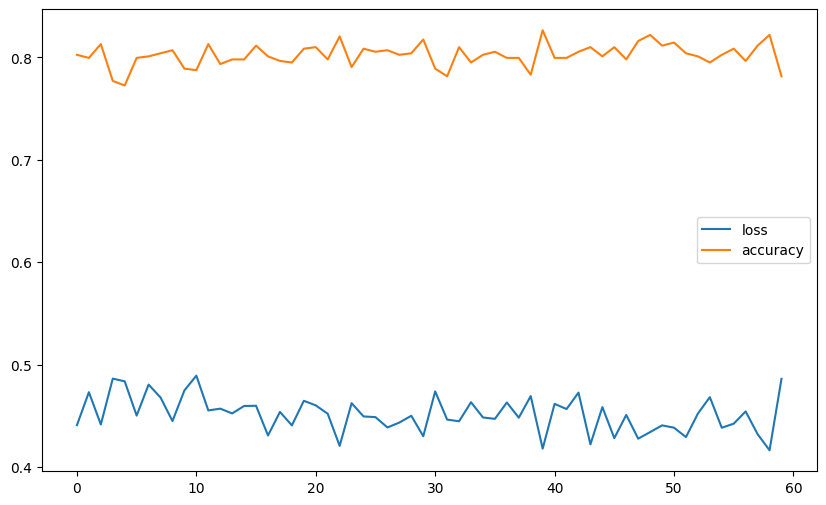

In [35]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

In [46]:
model.evaluate(X_train, y_train, verbose=2)

21/21 - 0s - loss: 0.3935 - accuracy: 0.8293 - 51ms/epoch - 2ms/step


[0.393451064825058, 0.8293412923812866]

In [47]:
y_pred = model.predict(X_test)

7/7 [==============================] - 0s 2ms/step


In [48]:
explained_variance_score(y_test, y_pred)

0.435376800234232

In [49]:
my_dict = {"Actual" : y_test, "Pred" : y_pred.reshape(-1,)}
compare = pd.DataFrame(my_dict)
compare.sample(10)


,Actual,Pred
178,0,0.119836
69,1,0.539328
170,0,0.089322
215,0,0.020894
203,1,0.661769
26,1,0.822198
188,0,0.685341
159,0,0.775586
162,0,0.068249
156,1,0.069413


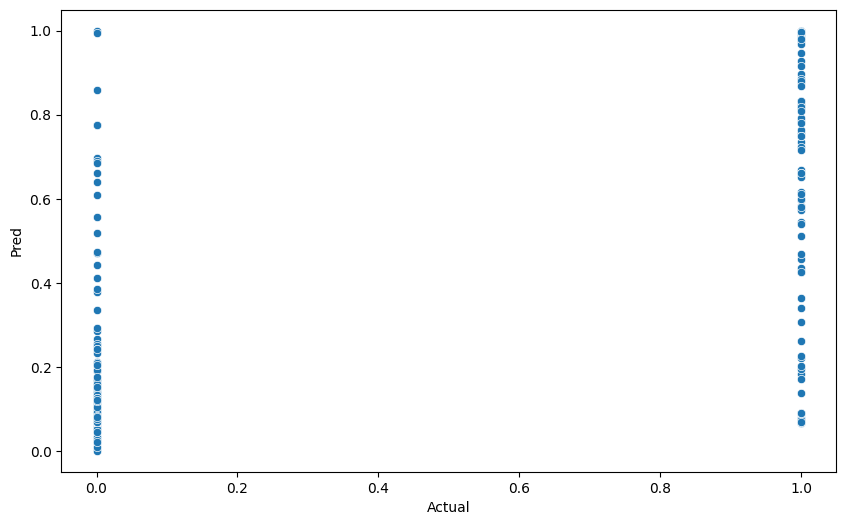

In [50]:
sns.scatterplot(x = 'Actual', y = 'Pred', data = compare);